# Model Testing
## Using Neural Networks

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

2025-04-07 03:37:06.544237: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 03:37:06.547182: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 03:37:06.555772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743997026.570286  130467 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743997026.574695  130467 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743997026.585993  130467 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
dataset = pd.read_csv("1.4.2.training_data.csv")  # Replace with your dataset path

In [3]:
print(dataset.columns)
dataset.columns = dataset.columns.str.strip()
print("Columns in dataset:", dataset.columns)
print(dataset.drop(columns=["time", "wind_spd_kmh", "gust_kmh"]))
print(dataset["wind_spd_kmh"])

Index(['time', 'air_temp', 'apparent_t', 'dewpt', 'rel_hum', 'delta_t',
       'wind_dir_deg', 'wind_spd_kmh', 'gust_kmh', 'rain_trace', 'rain_ten',
       'rain_hour', 'press', 'wet_bulb_temperature', 'gust-diff'],
      dtype='object')
Columns in dataset: Index(['time', 'air_temp', 'apparent_t', 'dewpt', 'rel_hum', 'delta_t',
       'wind_dir_deg', 'wind_spd_kmh', 'gust_kmh', 'rain_trace', 'rain_ten',
       'rain_hour', 'press', 'wet_bulb_temperature', 'gust-diff'],
      dtype='object')
       air_temp  apparent_t     dewpt  rel_hum   delta_t  wind_dir_deg  \
0      0.620818    0.564039  0.843915     0.91  0.046784      0.777778   
1      0.667286    0.613300  0.867725     0.83  0.105263      0.405556   
2      0.661710    0.573892  0.880952     0.87  0.076023      0.072222   
3      0.492565    0.199507  0.523810     0.64  0.181287      0.538889   
4      0.392193    0.105911  0.462963     0.78  0.081871      0.705556   
...         ...         ...       ...      ...       ...    

In [4]:
# Define neural network
model = Sequential(
    [
        Dense(30, activation="relu", input_shape=(11,)),
        Dense(30, activation="relu"),  # Hidden layer
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

# Alternative model definition
model_leaky = Sequential(
    [
        Dense(30, input_shape=(11,)),
        LeakyReLU(alpha=0.01),  # Leaky ReLU activation
        Dense(30),  # Hidden layerF
        LeakyReLU(alpha=0.01),  # Leaky ReLU activation
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

model_big = Sequential(
    [
        Dense(100, activation="relu", input_shape=(11,)),
        Dense(100, activation="relu"),  # Hidden layer
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-07 03:37:09.484454: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [5]:
# set the seed for reproducibility
tf.random.set_seed(42)

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Compile the alternative model
model_leaky.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Compile the bigger model
model_big.compile(optimizer="adam", loss="mse", metrics=["mae"])

# all columns except "wind_spd_kmh", "time", and "gust_kmh" are features
X = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).to_numpy()

# wind_spd_kmh and gust_kmh are the target variables
y = dataset[["wind_spd_kmh", "gust_kmh", "wind_dir_deg"]].to_numpy()


early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Split the dataset into training and testing set


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0485 - mae: 0.1533 - val_loss: 0.0211 - val_mae: 0.0915
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0204 - mae: 0.0868 - val_loss: 0.0182 - val_mae: 0.0771
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0186 - mae: 0.0767 - val_loss: 0.0173 - val_mae: 0.0695
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0179 - mae: 0.0714 - val_loss: 0.0170 - val_mae: 0.0675
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0176 - mae: 0.0693 - val_loss: 0.0168 - val_mae: 0.0660
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0175 - mae: 0.0686 - val_loss: 0.0167 - val_mae: 0.0651
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0173 - mae: 0.0683 - val_loss: 0.0165 - val_mae: 0.0645
Epoch 8/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0173 - mae: 0.0680 - val_loss: 0.0165 - val_mae: 0.0642
Epoch 9/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [7]:
# Train the alternative model
model_leaky.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0611 - mae: 0.1787 - val_loss: 0.0209 - val_mae: 0.0952
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0205 - mae: 0.0919 - val_loss: 0.0188 - val_mae: 0.0837
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0193 - mae: 0.0843 - val_loss: 0.0180 - val_mae: 0.0776
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0185 - mae: 0.0789 - val_loss: 0.0175 - val_mae: 0.0734
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0179 - mae: 0.0738 - val_loss: 0.0170 - val_mae: 0.0689
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0175 - mae: 0.0706 - val_loss: 0.0167 - val_mae: 0.0656
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0174 - mae: 0.0691 - val_loss: 0.0166 - val_mae: 0.0647
Epoch 8/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0172 - mae: 0.0683 - val_loss: 0.0166 - val_mae: 0.0640
Epoch 9/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [8]:
model_big.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0373 - mae: 0.1329 - val_loss: 0.0184 - val_mae: 0.0759
Epoch 2/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0186 - mae: 0.0756 - val_loss: 0.0174 - val_mae: 0.0703
Epoch 3/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0178 - mae: 0.0697 - val_loss: 0.0170 - val_mae: 0.0688
Epoch 4/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0176 - mae: 0.0687 - val_loss: 0.0167 - val_mae: 0.0631
Epoch 5/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0173 - mae: 0.0677 - val_loss: 0.0165 - val_mae: 0.0618
Epoch 6/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0172 - mae: 0.0667 - val_loss: 0.0163 - val_mae: 0.0618
Epoch 7/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0170 - mae: 0.0663 - val_loss: 0.0163 - val_mae: 0.0627
Epoch 8/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0169 - mae: 0.0662 - val_loss: 0.0163 - val_mae: 0.0632
Epoch 9/100
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [9]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}, Test MAE: {mae:.5f}")

# Evaluate the alternative model
loss_leaky, mae_leaky = model_leaky.evaluate(X_test, y_test)
print(f"Test Loss: {loss_leaky:.5f}, Test MAE: {mae_leaky:.5f}")

# Evaluate the bigger model
loss_big, mae_big = model_big.evaluate(X_test, y_test)
print(f"Test Loss: {loss_big:.5f}, Test MAE: {mae_big:.5f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.0139 - mae: 0.0562
Test Loss: 0.01418, Test MAE: 0.05689
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.0137 - mae: 0.0530
Test Loss: 0.01408, Test MAE: 0.05381
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0137 - mae: 0.0529
Test Loss: 0.01414, Test MAE: 0.05369


In [10]:
# which columns are most important
importances = model.layers[0].get_weights()[0]
importances = np.abs(importances).sum(axis=1)
indices = np.argsort(importances)[::-1]

# Extract feature names from the dataset
feature_names = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).columns

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]})")

# print the model structure and weights

model.summary()

Feature ranking:
1. apparent_t (13.603475570678711)
2. rain_trace (10.552696228027344)
3. gust-diff (10.392504692077637)
4. rain_hour (10.237818717956543)
5. rain_ten (8.216938018798828)
6. wet_bulb_temperature (7.845094203948975)
7. delta_t (7.088868618011475)
8. dewpt (6.677179336547852)
9. air_temp (5.799149036407471)
10. rel_hum (5.715707302093506)
11. press (4.215734481811523)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.22 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,768 (10.82 KB)

In [11]:
importances_leaky = model_leaky.layers[0].get_weights()[0]
importances_leaky = np.abs(importances_leaky).sum(axis=1)
indices_leaky = np.argsort(importances_leaky)[::-1]

# Extract feature names from the dataset
feature_names_leaky = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).columns
print("Feature ranking for Leaky ReLU:")
for i in range(X.shape[1]):
    print(
        f"{i + 1}. {feature_names_leaky[indices_leaky[i]]} ({importances_leaky[indices_leaky[i]]})"
    )

# print the model structure and weights
model_leaky.summary()

Feature ranking for Leaky ReLU:
1. rain_hour (14.691529273986816)
2. rain_trace (13.797489166259766)
3. gust-diff (13.144230842590332)
4. apparent_t (10.271780014038086)
5. rain_ten (9.84277629852295)
6. delta_t (9.375689506530762)
7. wet_bulb_temperature (8.07244873046875)
8. press (6.8962016105651855)
9. rel_hum (6.887538433074951)
10. dewpt (6.269629955291748)
11. air_temp (5.184323310852051)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.22 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,768 (10.82 KB)

In [12]:
importances_big = model_big.layers[0].get_weights()[0]
importances_big = np.abs(importances_big).sum(axis=1)
indices_big = np.argsort(importances_big)[::-1]

# Extract feature names from the dataset
feature_names_big = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).columns
print("Feature ranking for bigger model:")
for i in range(X.shape[1]):
    print(
        f"{i + 1}. {feature_names_big[indices_big[i]]} ({importances_big[indices_big[i]]})"
    )

# print the model structure and weights
model_big.summary()

Feature ranking for bigger model:
1. gust-diff (26.183862686157227)
2. rain_hour (22.141265869140625)
3. rain_trace (20.54775047302246)
4. apparent_t (20.352869033813477)
5. rain_ten (19.323991775512695)
6. wet_bulb_temperature (14.3773832321167)
7. delta_t (14.18790054321289)
8. press (13.545698165893555)
9. dewpt (12.673943519592285)
10. rel_hum (12.664450645446777)
11. air_temp (12.040445327758789)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,811 (135.98 KB)

 Trainable params: 11,603 (45.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,208 (90.66 KB)

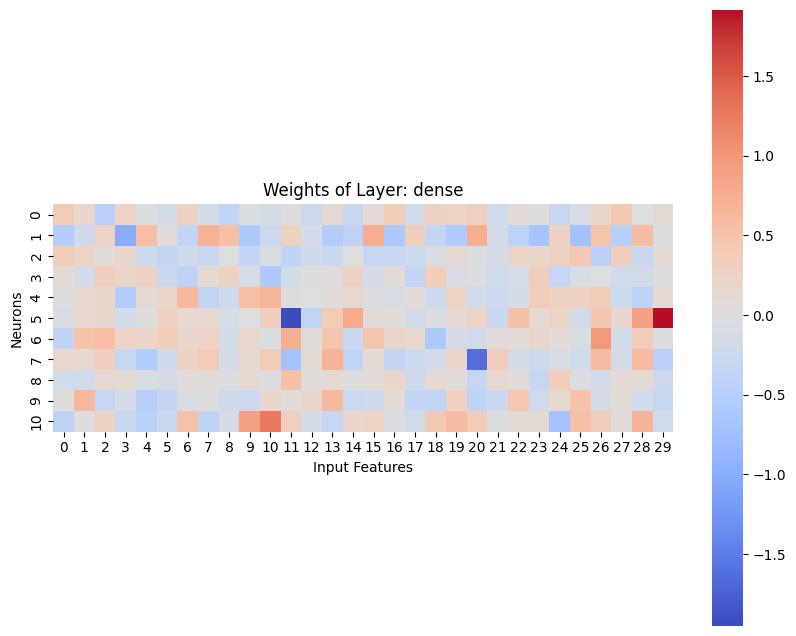

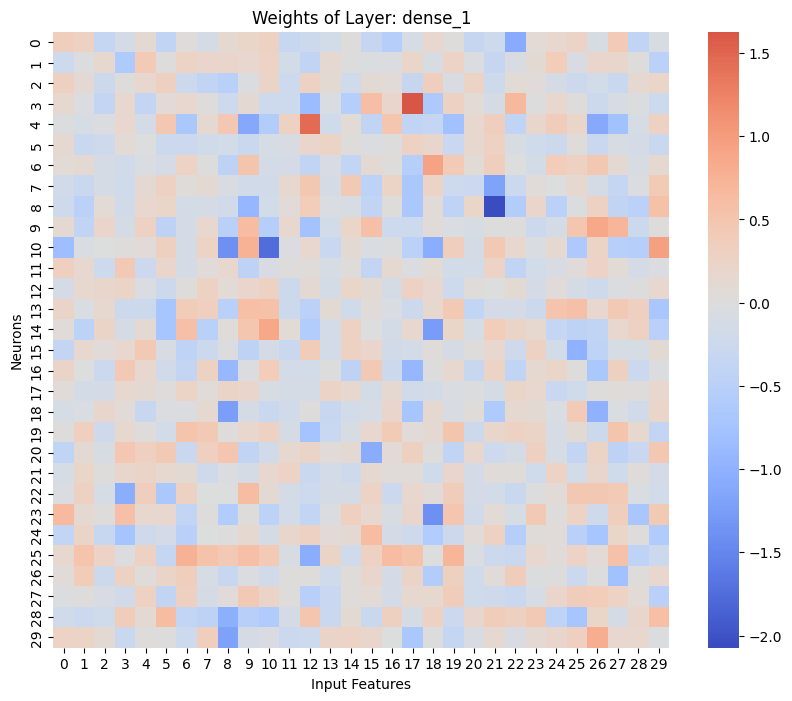

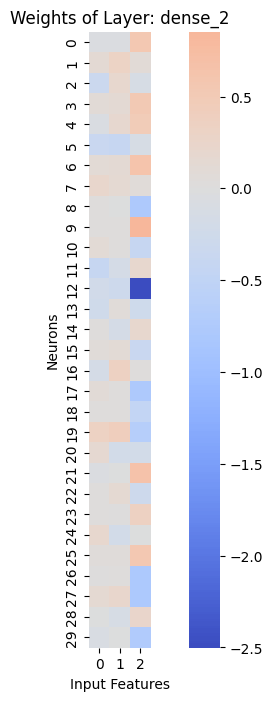

In [13]:
# visualise the model's individual neurons and weights
import matplotlib.pyplot as plt
import seaborn as sns


def plot_neuron_weights(model):
    for layer in model.layers:
        if isinstance(layer, Dense):
            weights = layer.get_weights()[0]

            plt.figure(figsize=(10, 8))
            sns.heatmap(
                weights, annot=False, cmap="coolwarm", cbar=True, center=0, square=True
            )
            plt.title(f"Weights of Layer: {layer.name}")
            plt.xlabel("Input Features")
            plt.ylabel("Neurons")
            plt.show()


plot_neuron_weights(model)

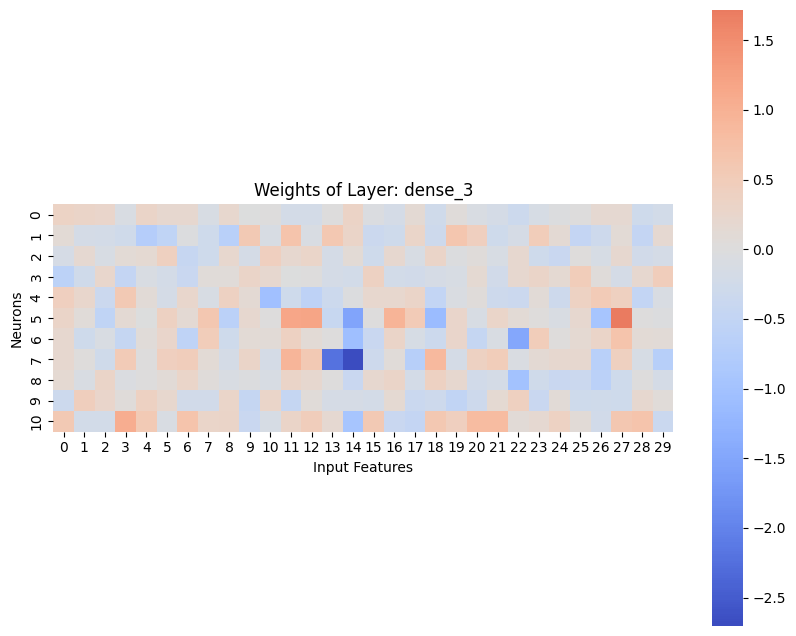

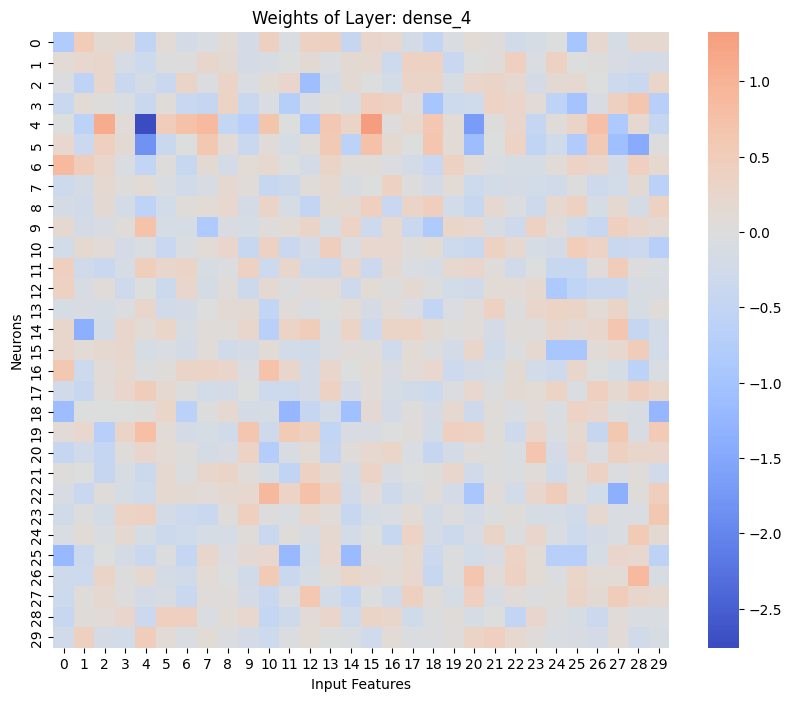

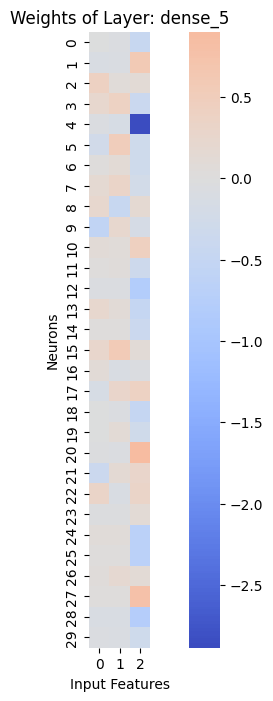

In [14]:
plot_neuron_weights(model_leaky)

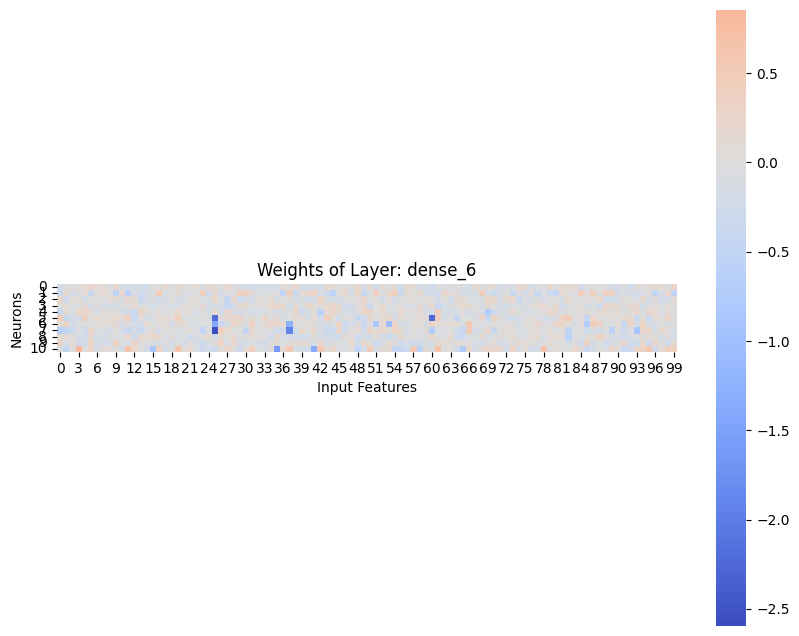

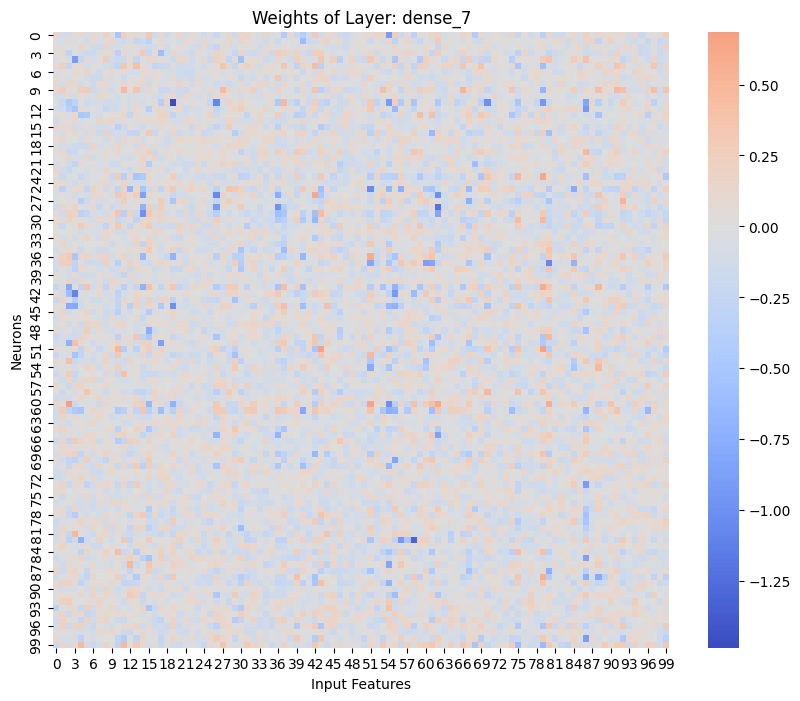

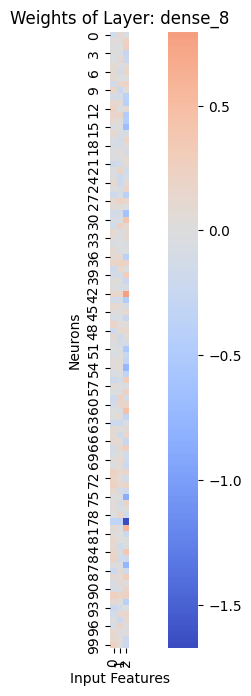

In [15]:
plot_neuron_weights(model_big)

In [17]:
# Save the models to a file
model.save("../1.5.Model_Testing_and_Validation/trained_model.keras")
model_leaky.save("../1.5.Model_Testing_and_Validation/trained_model_leaky.keras")
model_big.save("../1.5.Model_Testing_and_Validation/trained_model_big.keras")

print(
    f"""Model saved to:
    ../1.5.Model_Testing_and_Validation/trained_model.keras
    ../1.5.Model_Testing_and_Validation/trained_model_leaky.keras
    ../1.5.Model_Testing_and_Validation/trained_model_big.keras
    """
)

Model saved to:
    ../1.5.Model_Testing_and_Validation/trained_model.keras
    ../1.5.Model_Testing_and_Validation/trained_model_leaky.keras
    ../1.5.Model_Testing_and_Validation/trained_model_big.keras
    
